
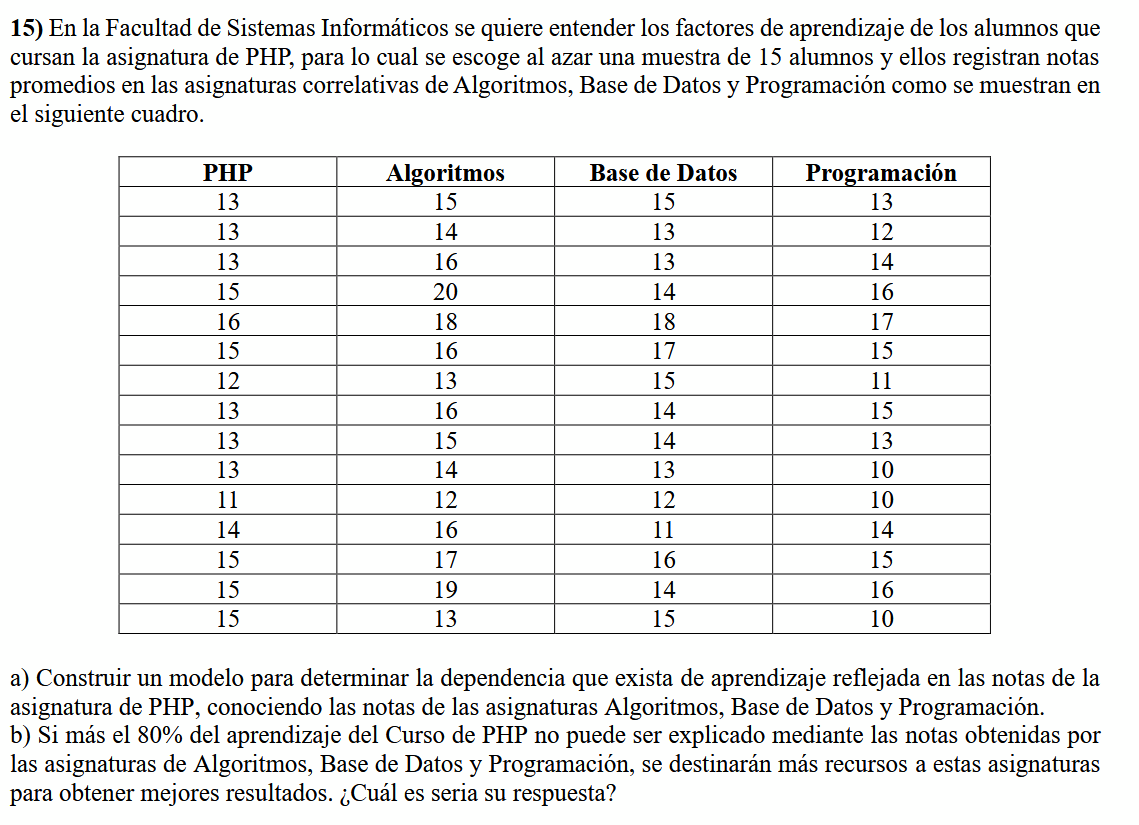


## a)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Crear el DataFrame
data = {
    'PHP': [13, 13, 13, 15, 16, 15, 12, 13, 13, 13, 11, 14, 15, 15, 15],
    'Algoritmos': [15, 14, 16, 20, 18, 16, 13, 16, 15, 14, 12, 16, 17, 19, 13],
    'Base_de_Datos': [15, 13, 13, 14, 18, 17, 15, 14, 14, 13, 12, 11, 16, 14, 15],
    'Programacion': [13, 12, 14, 16, 17, 15, 11, 15, 13, 10, 10, 14, 15, 16, 10]
}

"""También podría tener la forma:
 X = np.array([
    [15, 15, 13],
    [14, 13, 12],
    [16, 13, 14],
    [20, 14, 16],
    [18, 18, 17],
    [16, 17, 15],
    [13, 15, 11],
    [16, 14, 15],
    [15, 14, 13],
    [14, 13, 10],
    [12, 12, 10],
    [16, 11, 14],
    [17, 16, 15],
    [19, 14, 16],
    [13, 15, 10]
])}"""

df = pd.DataFrame(data)

X = df[['Algoritmos', 'Base_de_Datos', 'Programacion']].values
y = df['PHP'].values

In [18]:
# Los resultados son (filas, columnas)
print(f"dimension de X: {X.shape}")
print(f"dimension de Y: {y.shape}")

dimension de X: (15, 3)
dimension de Y: (15,)


In [19]:
# Agrego una columna de unos para el término independiente
X = np.column_stack((np.ones(X.shape[0]), X))

In [20]:
print(f"dimension de X: {X.shape}")

dimension de X: (15, 4)


Los coeficientes luego de despejar quedan:



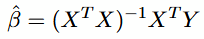

In [24]:
# Resuelvo productos punto e inversas.

XTX = np.dot(X.T, X)
print(XTX.shape)
XTX_inv = np.linalg.inv(XTX)
XTy = np.dot(X.T, y)
beta = np.dot(XTX_inv, XTy)

y_pred = np.dot(X, beta)

print("Coeficientes:")
print(f"B0 (Ordenada al origen): {beta[0]:.4f}")
print(f"B1 (Algoritmos): {beta[1]:.4f}")
print(f"B2 (Base de Datos): {beta[2]:.4f}")
print(f"B3 (Programación): {beta[3]:.4f}")


print("\nPrimeras filas del DataFrame:")
print(df)

(4, 4)
Coeficientes:
B0 (Ordenada al origen): 2.5515
B1 (Algoritmos): 0.5827
B2 (Base de Datos): 0.3735
B3 (Programación): -0.2415

Primeras filas del DataFrame:
    PHP  Algoritmos  Base_de_Datos  Programacion
0    13          15             15            13
1    13          14             13            12
2    13          16             13            14
3    15          20             14            16
4    16          18             18            17
5    15          16             17            15
6    12          13             15            11
7    13          16             14            15
8    13          15             14            13
9    13          14             13            10
10   11          12             12            10
11   14          16             11            14
12   15          17             16            15
13   15          19             14            16
14   15          13             15            10


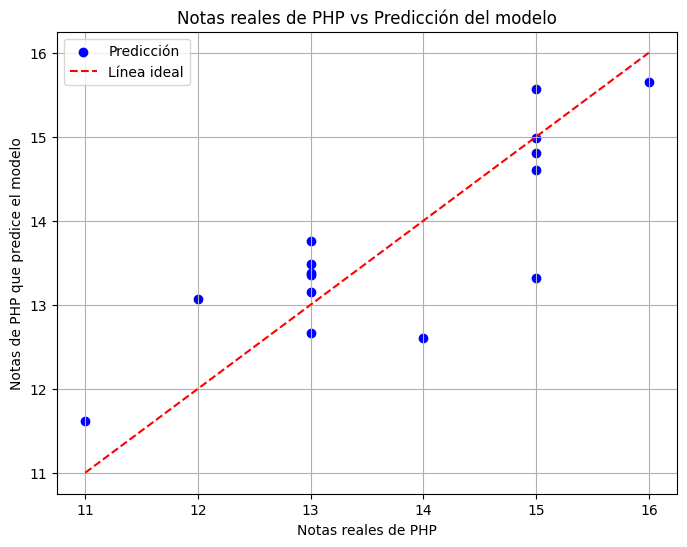

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue', label='Predicción')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Línea ideal')

plt.title('Notas reales de PHP vs Predicción del modelo')
plt.xlabel('Notas reales de PHP')
plt.ylabel('Notas de PHP que predice el modelo')
plt.legend()
plt.grid(True)
plt.show()

### Checkeo de nuestro modelo con statsmodel

In [23]:
import statsmodels.api as sm

X = df[['Algoritmos', 'Base_de_Datos', 'Programacion']]
Y = df['PHP']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
summary = model.summary()

rsquared = model.rsquared

summary, rsquared

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    PHP   R-squared:                       0.697
 Model:                            OLS   Adj. R-squared:                  0.614
 Method:                 Least Squares   F-statistic:                     8.436
 Date:                Fri, 13 Sep 2024   Prob (F-statistic):            0.00342
 Time:                        21:57:18   Log-Likelihood:                -16.718
 No. Observations:                  15   AIC:                             41.44
 Df Residuals:                      11   BIC:                             44.27
 Df Model:                           3                                         
 Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
 ------------------------------------------------------------------

Usando esta librería podemos observar que los valores de los Beta asociados a cada atributo son:

Ordenada en el origen: 2.5515

Algoritmos: 0.5827

Base de datos: 0.3735

Programacion: -0.2415

## b)

*Más* de un 80% de las notas obtenidas por PHP no pueden ser explicadas por el modelo, esto quiere decir que usar las notas de estas asignaturas para predecir la nota de PHP no sirve la gran mayoría del tiempo. Entonces, ¿tiene sentido destinarle más recursos al resto de las asignaturas para obtener mejores resultados en PHP?